In [1]:
# for array operations
import numpy as np
# for visualizing data
import matplotlib.pyplot as plt
# for using dataframe
import pandas as pd
# for splitting the data into train and test sets
from sklearn.model_selection import train_test_split
# for applying feature scaling
from sklearn.preprocessing import StandardScaler
# For calculating metrics and visualizing prediction related metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#reading the data
dataset = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

In [3]:
print(dataset.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [4]:
y = dataset.iloc[:,9]

In [5]:
X = dataset.drop(['Personal Loan'], axis=1)
X = X.drop(['ID'], axis=1)

In [6]:
print(X.head())
print(y.head())

   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


In [7]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

/home/atharva/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

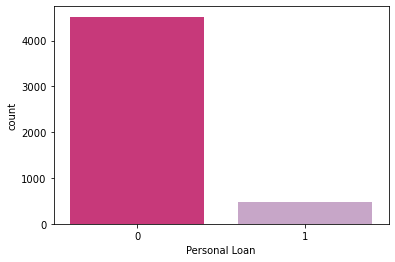

In [8]:
import seaborn as sns
from random import randint
value = randint(0, len(colors)-1)
sns.countplot('Personal Loan',data=dataset,palette = colors[value])

In [9]:
ConfusionMatrixReportMetrics = []
ConfusionMatrixMetrics = []
labels = []
historyMetric = []

In [10]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.80      0.84       129
           0       0.98      0.99      0.98      1121

    accuracy                           0.97      1250
   macro avg       0.93      0.89      0.91      1250
weighted avg       0.97      0.97      0.97      1250



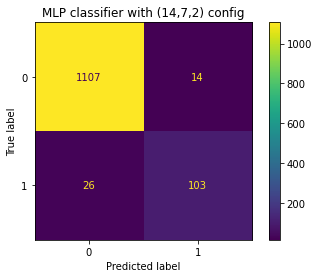

In [12]:
# using MLP classfier to map input to an output
from sklearn.neural_network import MLPClassifier
# creating a classifier object with certain parameters
# such as alpha, perceptron architecture, random state and max iterations
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(14,7,2),random_state=1,max_iter=7000)
# passing the data to the classfier for training
clf.fit(X_train,y_train.values.ravel())
#Testing the score of trained model based on test data set
clf.score(X_test, y_test)
# After training, testing the newly learned model with new test set inputs storing them in pred
pred=clf.predict(X_test)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
ConfusionMatrixReportMetrics.append(matrix)
print('Classification report : \n',matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("MLP classifier with (14,7,2) config")
ConfusionMatrixMetrics.append(result)
plt.show()
labels.append("MLP classifier with (14,7,2) config")

In [13]:
from keras.models import Sequential
from keras.layers import Dense

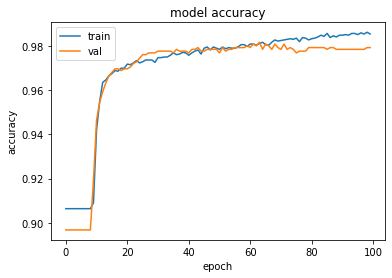

Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.85      0.89       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.96      0.92      0.94      1250
weighted avg       0.98      0.98      0.98      1250



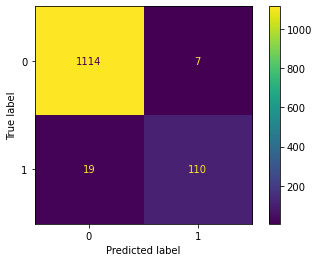

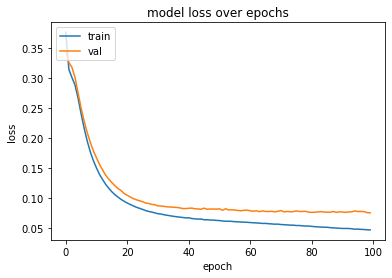

In [14]:
ann_type_1 = Sequential()
ann_type_1.add(Dense(units=14, activation='sigmoid'))
ann_type_1.add(Dense(units=7, activation='sigmoid'))
ann_type_1.add(Dense(units=7, activation='sigmoid'))
ann_type_1.add(Dense(units=1, activation='sigmoid'))
ann_type_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_1.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data=(X_test, y_test), verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_1.predict(X_test)
temp= []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras Sequential classifier with config - (14,7,7,1), 32 batch_size, 100 epochs")

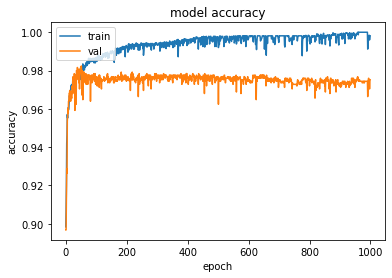

Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.83      0.87       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.95      0.91      0.93      1250
weighted avg       0.97      0.98      0.97      1250



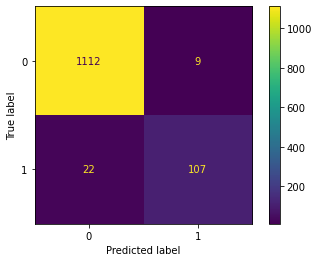

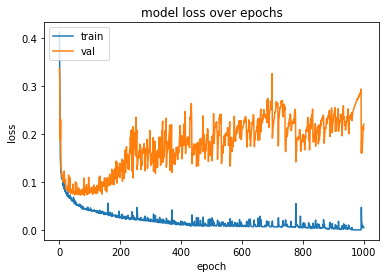

In [15]:
ann_type_2 = Sequential()
ann_type_2.add(Dense(units=14, activation='sigmoid'))
ann_type_2.add(Dense(units=1000, activation='sigmoid'))
ann_type_2.add(Dense(units=1000, activation='sigmoid'))
ann_type_2.add(Dense(units=1000, activation='sigmoid'))
ann_type_2.add(Dense(units=1, activation='sigmoid'))
ann_type_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_2.fit(X_train, y_train, batch_size = 32, epochs = 1000, validation_data=(X_test, y_test),verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_2.predict(X_test)
temp =  []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras sequential classifier with config - (14,1000,1000,1), 32 batch_size, 1000 epochs")

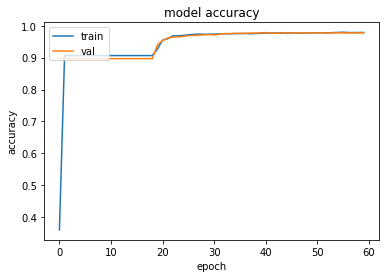

Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.83      0.88       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.96      0.91      0.94      1250
weighted avg       0.98      0.98      0.98      1250



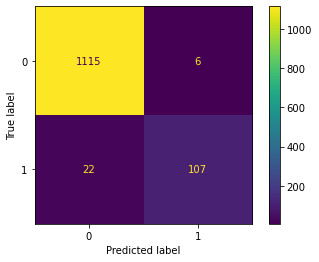

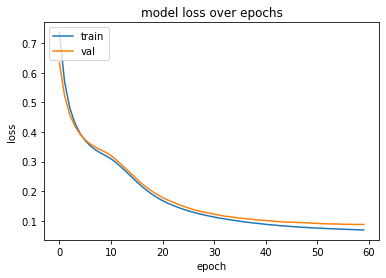

In [16]:
ann_type_3 = Sequential()
ann_type_3.add(Dense(units=14, activation='sigmoid'))
ann_type_3.add(Dense(units=7, activation='sigmoid'))
ann_type_3.add(Dense(units=2, activation='sigmoid'))
ann_type_3.add(Dense(units=1, activation='sigmoid'))
ann_type_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_3.fit(X_train, y_train, batch_size = 32, epochs = 60, validation_data=(X_test, y_test),verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_3.predict(X_test)
temp =  []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras sequential classifier with config - (14,7,2,1), 32 batch_size, 60 epochs")

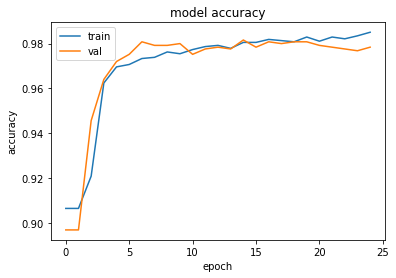

Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.85      0.89       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.96      0.92      0.94      1250
weighted avg       0.98      0.98      0.98      1250



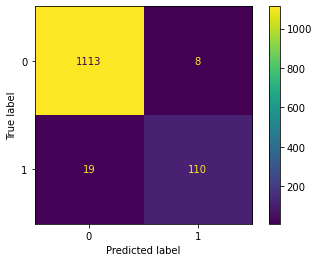

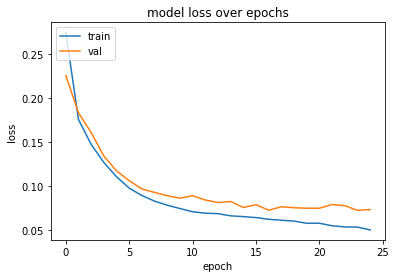

In [17]:
ann_type_5 = Sequential()
ann_type_5.add(Dense(units=14, activation='sigmoid'))
ann_type_5.add(Dense(units=7, activation='sigmoid'))
ann_type_5.add(Dense(units=2, activation='sigmoid'))
ann_type_5.add(Dense(units=1, activation='sigmoid'))
ann_type_5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_5.fit(X_train, y_train, batch_size = 1, epochs = 25, validation_data=(X_test, y_test),verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_5.predict(X_test)
temp =  []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras sequential classifier with config - (14,7,2,1), 1 batch_size, 25 epochs")

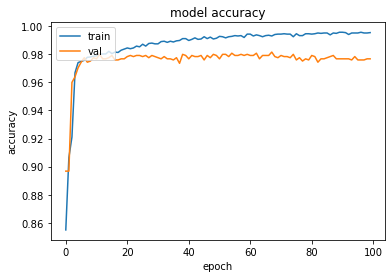

Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.84      0.88       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.95      0.92      0.93      1250
weighted avg       0.98      0.98      0.98      1250



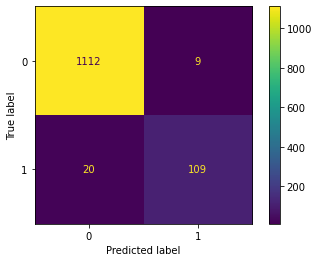

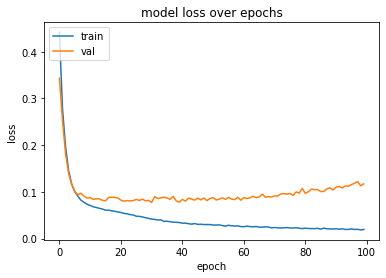

In [18]:
ann_type_6 = Sequential()
ann_type_6.add(Dense(units=14, activation='sigmoid'))
ann_type_6.add(Dense(units=7, activation='sigmoid'))
ann_type_6.add(Dense(units=2, activation='sigmoid'))
ann_type_6.add(Dense(units=1, activation='sigmoid'))
ann_type_6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_6.fit(X_train, y_train, batch_size = 1, epochs = 100, validation_data=(X_test, y_test),verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_6.predict(X_test)
temp =  []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras sequential classifier with config - (14,7,2,1), 1 batch_size, 100 epochs")

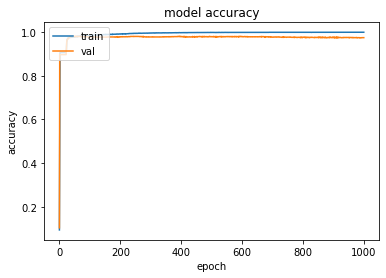

Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.84      0.87       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.97      1250
   macro avg       0.94      0.91      0.93      1250
weighted avg       0.97      0.97      0.97      1250



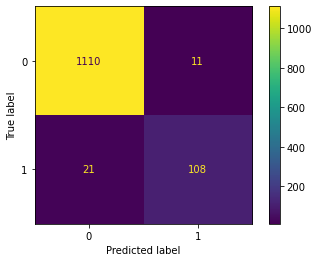

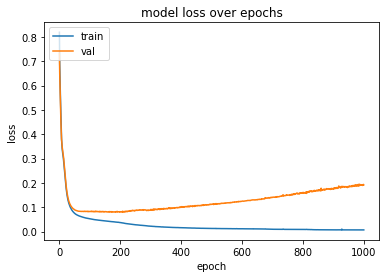

In [19]:
ann_type_7 = Sequential()
ann_type_7.add(Dense(units=14, activation='sigmoid'))
ann_type_7.add(Dense(units=7, activation='sigmoid'))
ann_type_7.add(Dense(units=2, activation='sigmoid'))
ann_type_7.add(Dense(units=1, activation='sigmoid'))
ann_type_7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_7.fit(X_train, y_train, batch_size = 32, epochs = 1000, validation_data=(X_test, y_test),verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_7.predict(X_test)
temp =  []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras sequential classifier with config - (14,7,2,1), 32 batch_size, 1000 epochs")

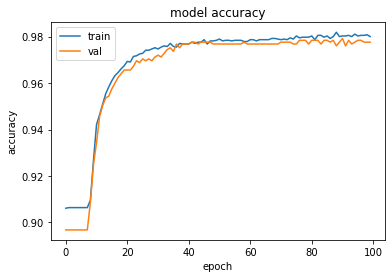

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.81      0.88       129
           0       0.98      1.00      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.97      0.91      0.93      1250
weighted avg       0.98      0.98      0.98      1250



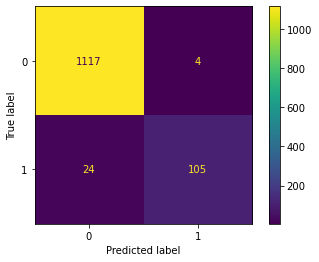

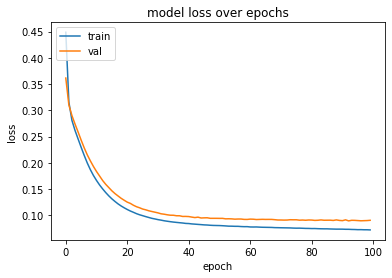

In [20]:
from keras.layers import Dropout
from keras import regularizers
ann_type_4 = Sequential()
ann_type_4.add(Dense(units=14, activation='sigmoid', kernel_regularizer=regularizers.l2(.0001)))
ann_type_4.add(Dense(units=7, activation='sigmoid', kernel_regularizer=regularizers.l2(.0001)))
ann_type_4.add(Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(.0001)))
ann_type_4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_type_4.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data=(X_test, y_test),verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
historyMetric.append(history)
pred = ann_type_4.predict(X_test)
temp =  []
for i in pred:
    if i > 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred = pd.Series(temp)
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)
ConfusionMatrixReportMetrics.append(matrix)
#Plotting a confusion matrix for better visualization
result = ConfusionMatrixDisplay.from_predictions(y_test, pred)
ConfusionMatrixMetrics.append(result)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
labels.append("Keras sequential classifier with config - (14,7,1), 32 batch_size, 100 epochs, l2(.0001) Regularization")

-------------------------------------------------------------------------------
MLP classifier with (14,7,2) config
              precision    recall  f1-score   support

           1       0.88      0.80      0.84       129
           0       0.98      0.99      0.98      1121

    accuracy                           0.97      1250
   macro avg       0.93      0.89      0.91      1250
weighted avg       0.97      0.97      0.97      1250

-------------------------------------------------------------------------------
Keras Sequential classifier with config - (14,7,7,1), 32 batch_size, 100 epochs
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       129
           0       0.98      0.99      0.99      1121

    accuracy                           0.98      1250
   macro avg       0.96      0.92      0.94      1250
weighted avg       0.98      0.98      0.98      1250

----------------------------------------------------------------------

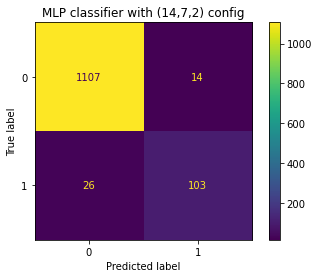

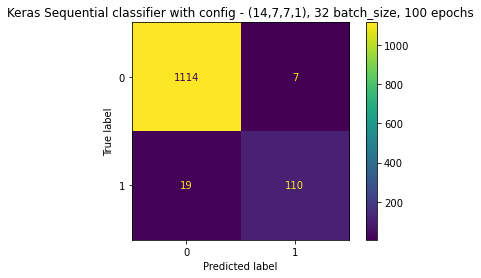

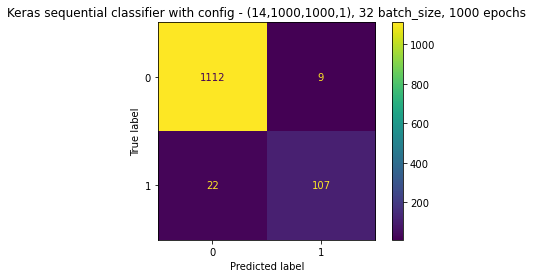

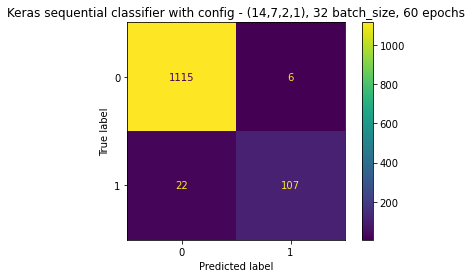

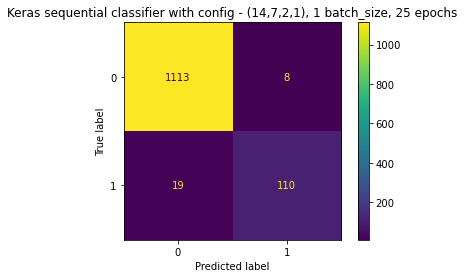

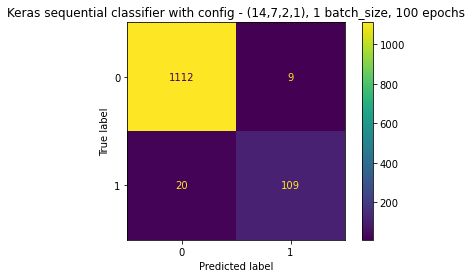

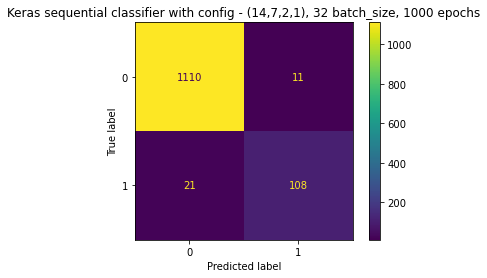

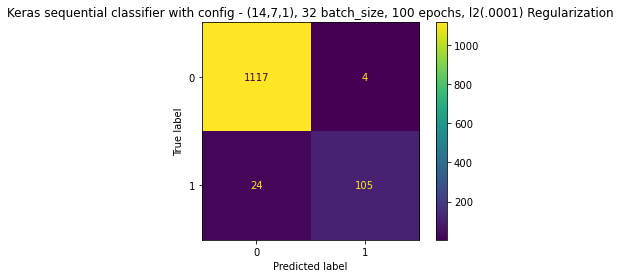

In [21]:
count = 0
for i in ConfusionMatrixReportMetrics:
    print("-------------------------------------------------------------------------------")
    print(labels[count])
    count +=1
    print(i)
count = 0
for i in ConfusionMatrixMetrics:
    print(labels[count])
    i.plot().ax_.set_title(labels[count])
    count +=1

-------------------------------------------------------------------------------
Keras Sequential classifier with config - (14,7,7,1), 32 batch_size, 100 epochs


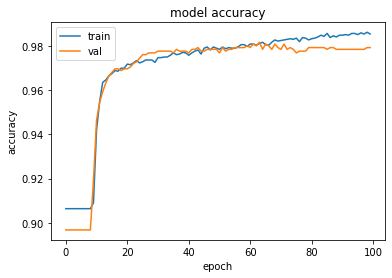

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,1000,1000,1), 32 batch_size, 1000 epochs


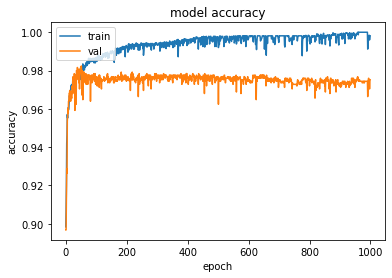

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 32 batch_size, 60 epochs


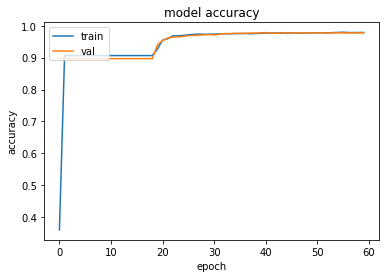

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 1 batch_size, 25 epochs


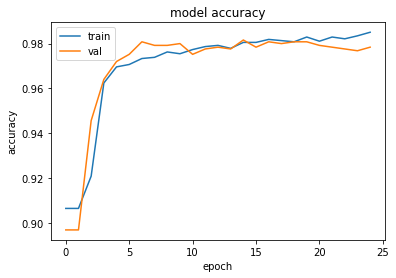

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 1 batch_size, 100 epochs


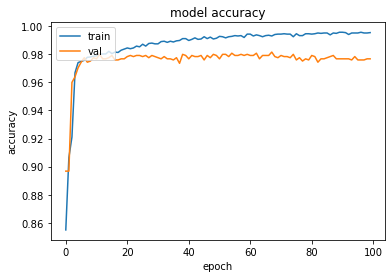

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 32 batch_size, 1000 epochs


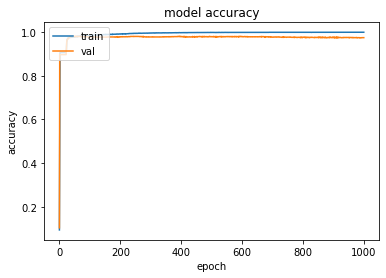

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,1), 32 batch_size, 100 epochs, l2(.0001) Regularization


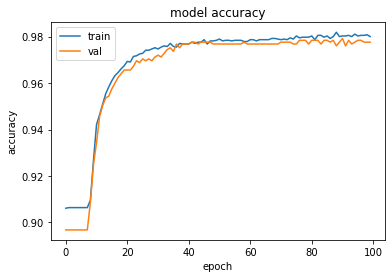

In [22]:
count = 1
for history in historyMetric:
    print("-------------------------------------------------------------------------------")
    print(labels[count])
    count +=1
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    

-------------------------------------------------------------------------------
Keras Sequential classifier with config - (14,7,7,1), 32 batch_size, 100 epochs


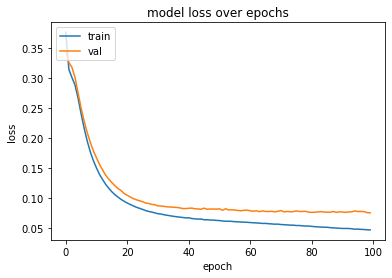

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,1000,1000,1), 32 batch_size, 1000 epochs


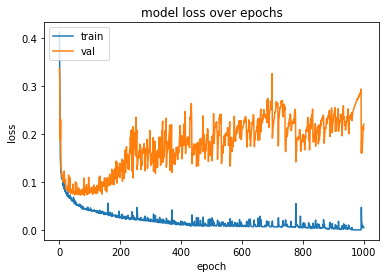

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 32 batch_size, 60 epochs


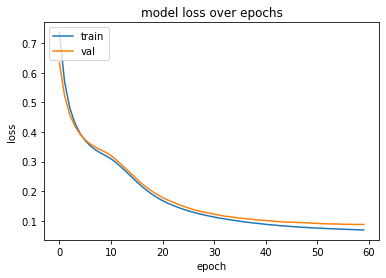

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 1 batch_size, 25 epochs


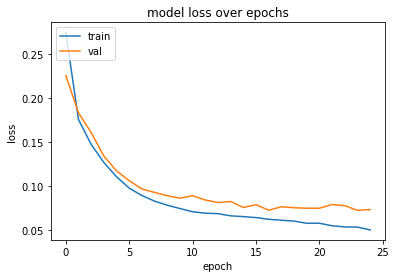

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 1 batch_size, 100 epochs


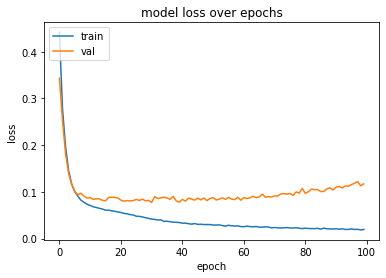

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,2,1), 32 batch_size, 1000 epochs


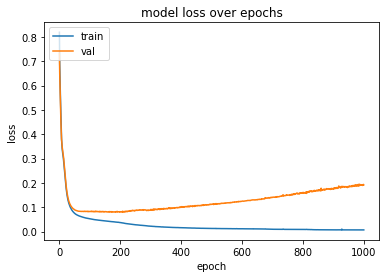

-------------------------------------------------------------------------------
Keras sequential classifier with config - (14,7,1), 32 batch_size, 100 epochs, l2(.0001) Regularization


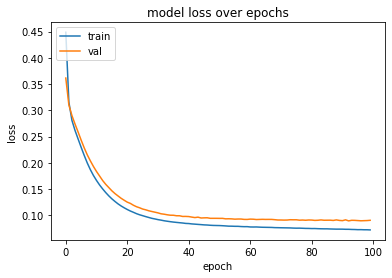

In [23]:
count = 1
for history in historyMetric:
    print("-------------------------------------------------------------------------------")
    print(labels[count])
    count +=1
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss over epochs')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    